In [51]:
from cobra import Reaction, Metabolite
from cobra.io import read_sbml_model
from cobra.io import write_sbml_model
from cameo.visualization.plotting.with_plotly import PlotlyPlotter
from cameo import phenotypic_phase_plane
plotter = PlotlyPlotter()

## Model with media LB with added violacein (using FAD)

In [52]:
model_LB_vio_fad=read_sbml_model('Models/model_VN_LB_vio-fad.xml')

Set aerobic conditions:

In [69]:
model_LB_vio_fad.reactions.EX_o2_e.lower_bound = -1000

Growth rate for V. natriegens [h^-1]: 21.163566928733623
Max. violacein production [mmol gDW^-1 h^-1]: 53.582029683112715
Theoretical maximum yield [mmol_vio / mmol_glc]: 5.3582029683112715


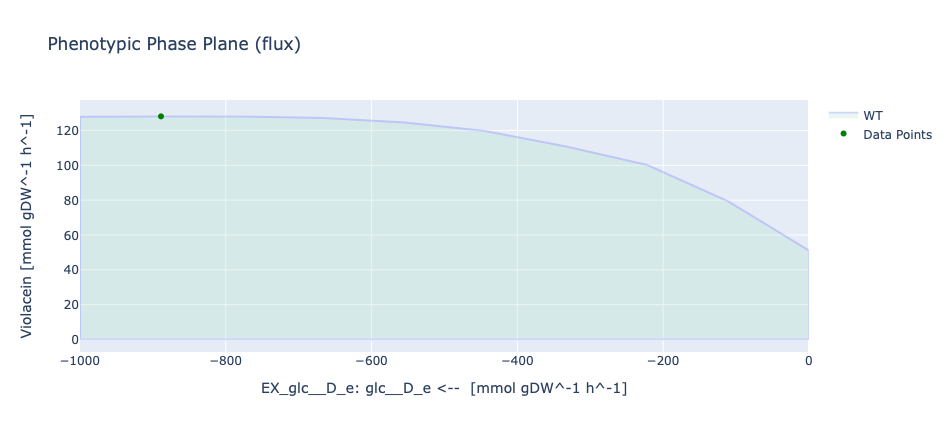

The optimal glucose uptake for Violacein flux is: -888.8888888888889


In [71]:
# With glucose as substrate
medium = model_LB_vio_fad.medium
with model_LB_vio_fad:
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Growth
    growth_rate = model_LB_vio_fad.optimize().objective_value
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    violacein_glc_yield = violacein_production / (-1*model_LB_vio_fad.reactions.EX_glc__D_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_glc]:', violacein_glc_yield)
    
    model_LB_vio_fad.reactions.EX_glc__D_e.bounds = -1000,0
    result = phenotypic_phase_plane(model_LB_vio_fad, 
                                variables=[model_LB_vio_fad.reactions.EX_glc__D_e],
                                objective=model_LB_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_glc__D_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal glucose uptake for Violacein flux is:", result.data_frame.EX_glc__D_e[result.data_frame.objective_upper_bound.idxmax()])

Growth rate for V. natriegens [h^-1]: 38.69149512993241
Max. violacein production [mmol gDW^-1 h^-1]: 120.71307300509339
Theoretical maximum yield [mmol_vio / mmol_mnl]: 0.17889792837373145


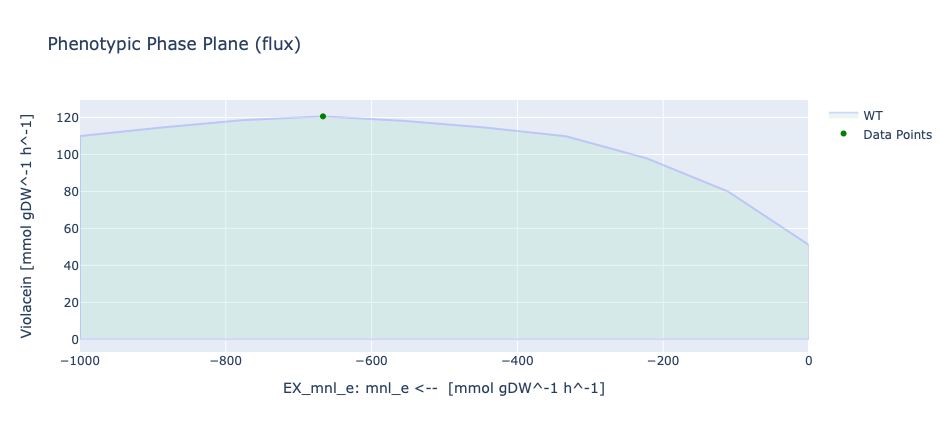

The optimal D-mannitol uptake for Violacein flux is: -666.6666666666666


In [72]:
# With D-mannitol as substrate
medium = model_LB_vio_fad.medium
with model_LB_vio_fad:
    medium['EX_glc__D_e'] = 0
    medium['EX_mnl_e'] = 1000
    model_LB_vio_fad.medium = medium
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Growth
    growth_rate = model_LB_vio_fad.optimize().objective_value
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    violacein_mnl_yield = violacein_production / (-1*model_LB_vio_fad.reactions.EX_mnl_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_mnl]:', violacein_mnl_yield)
    
    model_LB_vio_fad.reactions.EX_mnl_e.bounds = -1000,0
    result = phenotypic_phase_plane(model_LB_vio_fad, 
                                variables=[model_LB_vio_fad.reactions.EX_mnl_e],
                                objective=model_LB_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_mnl_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal D-mannitol uptake for Violacein flux is:", result.data_frame.EX_mnl_e[result.data_frame.objective_upper_bound.idxmax()])

Growth rate for V. natriegens [h^-1]: 38.69149512993236
Max. violacein production [mmol gDW^-1 h^-1]: 139.76101335330077
Theoretical maximum yield [mmol_vio / mmol_sucr]: 0.3755600343398289


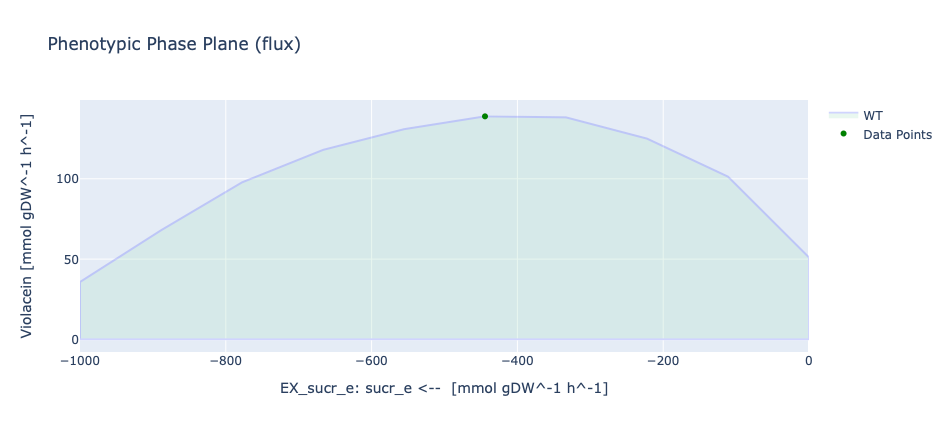

The optimal sucrose uptake for Violacein flux is: -444.44444444444446


In [73]:
# With sucrose as substrate
medium = model_LB_vio_fad.medium
with model_LB_vio_fad:
    medium['EX_glc__D_e'] = 0
    medium['EX_sucr_e'] = 1000
    model_LB_vio_fad.medium = medium
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Growth
    growth_rate = model_LB_vio_fad.optimize().objective_value
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    violacein_sucr_yield = violacein_production / (-1*model_LB_vio_fad.reactions.EX_sucr_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_sucr]:', violacein_sucr_yield)
    
    model_LB_vio_fad.reactions.EX_sucr_e.bounds = -1500,0
    result = phenotypic_phase_plane(model_LB_vio_fad, 
                                variables=[model_LB_vio_fad.reactions.EX_sucr_e],
                                objective=model_LB_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_sucr_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal sucrose uptake for Violacein flux is:", result.data_frame.EX_sucr_e[result.data_frame.objective_upper_bound.idxmax()])

Growth rate for V. natriegens [h^-1]: 38.683485483381915
Max. violacein production [mmol gDW^-1 h^-1]: 107.30212445948477
Theoretical maximum yield [mmol_vio / mmol_glyc]: 0.10730212445948477


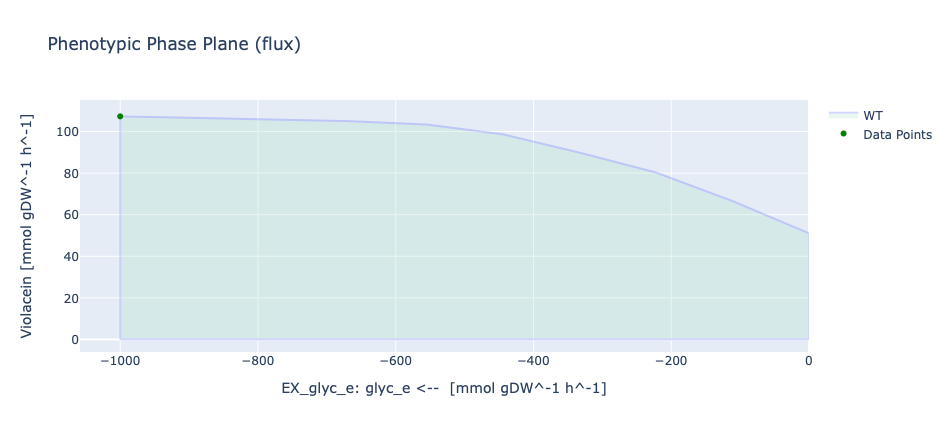

The optimal glycerol uptake for Violacein flux is: -1000.0


In [74]:
# With glycerol as substrate
medium = model_LB_vio_fad.medium
with model_LB_vio_fad:
    medium['EX_glc__D_e'] = 0
    medium['EX_glyc_e'] = 1000
    model_LB_vio_fad.medium = medium
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Growth
    growth_rate = model_LB_vio_fad.optimize().objective_value
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    violacein_glyc_yield = violacein_production / (-1*model_LB_vio_fad.reactions.EX_glyc_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_glyc]:', violacein_glyc_yield)
    
    model_LB_vio_fad.reactions.EX_glyc_e.bounds = -1500,0
    result = phenotypic_phase_plane(model_LB_vio_fad, 
                                variables=[model_LB_vio_fad.reactions.EX_glyc_e],
                                objective=model_LB_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_glyc_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal glycerol uptake for Violacein flux is:", result.data_frame.EX_glyc_e[result.data_frame.objective_upper_bound.idxmax()])

Growth rate for V. natriegens [h^-1]: 31.59572834309469
Max. violacein production [mmol gDW^-1 h^-1]: 130.5263157894737
Theoretical maximum yield [mmol_vio / mmol_acgam]: 0.1879737241030824


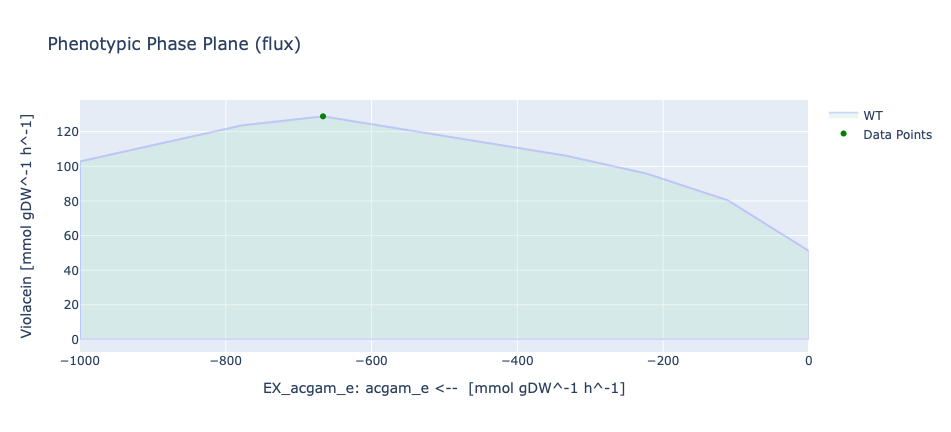

The optimal N-acetyl-D-glucosamine uptake for Violacein flux is: -666.6666666666666


In [38]:
# With N-acetyl-D-glucosamine as substrate
medium = model_LB_vio_fad.medium
with model_LB_vio_fad:
    medium['EX_glc__D_e'] = 0
    medium['EX_acgam_e'] = 1000
    model_LB_vio_fad.medium = medium
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Growth
    growth_rate = model_LB_vio_fad.optimize().objective_value
    model_LB_vio_fad.objective = model_LB_vio_fad.reactions.Violacein
    violacein_production = model_LB_vio_fad.optimize().objective_value
    violacein_acgam_yield = violacein_production / (-1*model_LB_vio_fad.reactions.EX_acgam_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_acgam]:', violacein_acgam_yield)
    
    model_LB_vio_fad.reactions.EX_acgam_e.bounds = -1500,0
    result = phenotypic_phase_plane(model_LB_vio_fad, 
                                variables=[model_LB_vio_fad.reactions.EX_acgam_e],
                                objective=model_LB_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_acgam_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal N-acetyl-D-glucosamine uptake for Violacein flux is:", result.data_frame.EX_acgam_e[result.data_frame.objective_upper_bound.idxmax()])

## Model with media LB with added violacein (using O2)

In [9]:
model_LB_vio_o2=read_sbml_model('Models/model_VN_LB_vio-o2.xml')

In [10]:
# With glucose as substrate
medium = model_LB_vio_o2.medium
with model_LB_vio_o2:
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Growth
    growth_rate = model_LB_vio_o2.optimize().objective_value
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Violacein
    violacein_production = model_LB_vio_o2.optimize().objective_value
    violacein_glc_yield = violacein_production / (-1*model_LB_vio_o2.reactions.EX_glc__D_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_glc]:', violacein_glc_yield)

Growth rate for V. natriegens [h^-1]: 2.8405970205438926
Max. violacein production [mmol gDW^-1 h^-1]: 2.5
Theoretical maximum yield [mmol_vio / mmol_glc]: 0.25


In [11]:
# With D-mannitol as substrate
medium = model_LB_vio_o2.medium
with model_LB_vio_o2:
    medium['EX_glc__D_e'] = 0
    medium['EX_mnl_e'] = 10
    model_LB_vio_o2.medium = medium
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Growth
    growth_rate = model_LB_vio_o2.optimize().objective_value
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Violacein
    violacein_production = model_LB_vio_o2.optimize().objective_value
    violacein_mnl_yield = violacein_production / (-1*model_LB_vio_o2.reactions.EX_mnl_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_mnl]:', violacein_mnl_yield)

Growth rate for V. natriegens [h^-1]: 2.840597020543895
Max. violacein production [mmol gDW^-1 h^-1]: 2.499999999999999
Theoretical maximum yield [mmol_vio / mmol_mnl]: 0.24999999999999992


In [12]:
# With sucrose as substrate
medium = model_LB_vio_o2.medium
with model_LB_vio_o2:
    medium['EX_glc__D_e'] = 0
    medium['EX_sucr_e'] = 10
    model_LB_vio_o2.medium = medium
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Growth
    growth_rate = model_LB_vio_o2.optimize().objective_value
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Violacein
    violacein_production = model_LB_vio_o2.optimize().objective_value
    violacein_sucr_yield = violacein_production / (-1*model_LB_vio_o2.reactions.EX_sucr_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_sucr]:', violacein_sucr_yield)

Growth rate for V. natriegens [h^-1]: 3.142039905536309
Max. violacein production [mmol gDW^-1 h^-1]: 2.5000000000000004
Theoretical maximum yield [mmol_vio / mmol_sucr]: 0.25000000000000006


In [13]:
# With glycerol as substrate
medium = model_LB_vio_o2.medium
with model_LB_vio_o2:
    medium['EX_glc__D_e'] = 0
    medium['EX_glyc_e'] = 10
    model_LB_vio_o2.medium = medium
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Growth
    growth_rate = model_LB_vio_o2.optimize().objective_value
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Violacein
    violacein_production = model_LB_vio_o2.optimize().objective_value
    violacein_glyc_yield = violacein_production / (-1*model_LB_vio_o2.reactions.EX_glyc_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_glyc]:', violacein_glyc_yield)

Growth rate for V. natriegens [h^-1]: 2.6688478035262206
Max. violacein production [mmol gDW^-1 h^-1]: 2.4999999999999987
Theoretical maximum yield [mmol_vio / mmol_glyc]: 0.24999999999999986


In [14]:
# With N-acetyl-D-glucosamine as substrate
medium = model_LB_vio_o2.medium
with model_LB_vio_o2:
    medium['EX_glc__D_e'] = 0
    medium['EX_acgam_e'] = 10
    model_LB_vio_o2.medium = medium
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Growth
    growth_rate = model_LB_vio_o2.optimize().objective_value
    model_LB_vio_o2.objective = model_LB_vio_o2.reactions.Violacein
    violacein_production = model_LB_vio_o2.optimize().objective_value
    violacein_acgam_yield = violacein_production / (-1*model_LB_vio_o2.reactions.EX_acgam_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_acgam]:', violacein_acgam_yield)

Growth rate for V. natriegens [h^-1]: 2.6769806205561997
Max. violacein production [mmol gDW^-1 h^-1]: 2.4999999999999996
Theoretical maximum yield [mmol_vio / mmol_acgam]: 0.24999999999999994


## Model with media M9 with added violacein (using FAD)

In [15]:
model_M9_vio_fad=read_sbml_model('Models/model_VN_M9_vio-fad.xml')

Set aerobic conditions:

In [75]:
model_M9_vio_fad.reactions.EX_o2_e.lower_bound = -100

Growth rate for V. natriegens [h^-1]: 0.8930785785011153
Max. violacein production [mmol gDW^-1 h^-1]: 2.3653643083420643
Theoretical maximum yield [mmol_vio / mmol_glc]: 0.23653643083420645


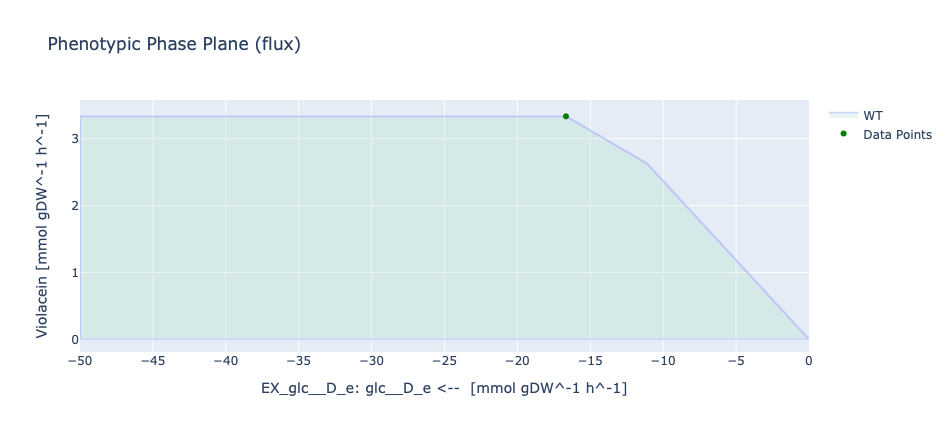

The optimal glucose uptake for Violacein flux is: -16.666666666666742


In [80]:
# With glucose as substrate
medium = model_M9_vio_fad.medium
with model_M9_vio_fad:
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Growth
    growth_rate = model_M9_vio_fad.optimize().objective_value
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Violacein
    violacein_production = model_M9_vio_fad.optimize().objective_value
    violacein_glc_yield = violacein_production / (-1*model_M9_vio_fad.reactions.EX_glc__D_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_glc]:', violacein_glc_yield)
    
    model_M9_vio_fad.reactions.EX_glc__D_e.bounds = -50,0
    result = phenotypic_phase_plane(model_M9_vio_fad, 
                                variables=[model_M9_vio_fad.reactions.EX_glc__D_e],
                                objective=model_M9_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_glc__D_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal glucose uptake for Violacein flux is:", result.data_frame.EX_glc__D_e[result.data_frame.objective_upper_bound.idxmax()])

Growth rate for V. natriegens [h^-1]: 0.8930785785012189
Max. violacein production [mmol gDW^-1 h^-1]: 2.433234421365031
Theoretical maximum yield [mmol_vio / mmol_mnl]: 0.2433234421365031


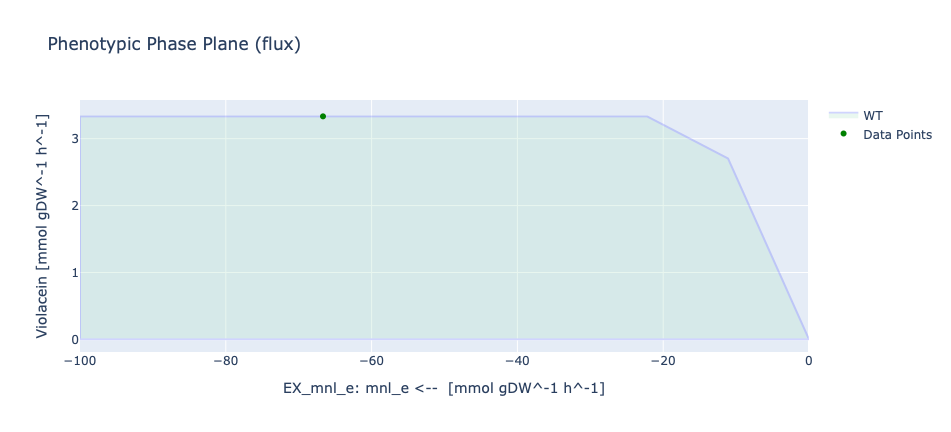

The optimal glucose uptake for Violacein flux is: -66.66666666666667


In [81]:
# With D-mannitol as substrate
medium = model_M9_vio_fad.medium
with model_M9_vio_fad:
    medium['EX_glc__D_e'] = 0
    medium['EX_mnl_e'] = 10
    model_M9_vio_fad.medium = medium
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Growth
    growth_rate = model_M9_vio_fad.optimize().objective_value
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Violacein
    violacein_production = model_M9_vio_fad.optimize().objective_value
    violacein_mnl_yield = violacein_production / (-1*model_M9_vio_fad.reactions.EX_mnl_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_mnl]:', violacein_mnl_yield)
    
    model_M9_vio_fad.reactions.EX_mnl_e.bounds = -100,0
    result = phenotypic_phase_plane(model_M9_vio_fad, 
                                variables=[model_M9_vio_fad.reactions.EX_mnl_e],
                                objective=model_M9_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_mnl_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal glucose uptake for Violacein flux is:", result.data_frame.EX_mnl_e[result.data_frame.objective_upper_bound.idxmax()])

Growth rate for V. natriegens [h^-1]: 0.8930785785010918
Max. violacein production [mmol gDW^-1 h^-1]: 3.3333333333332305
Theoretical maximum yield [mmol_vio / mmol_sucr]: 0.43214756258233633


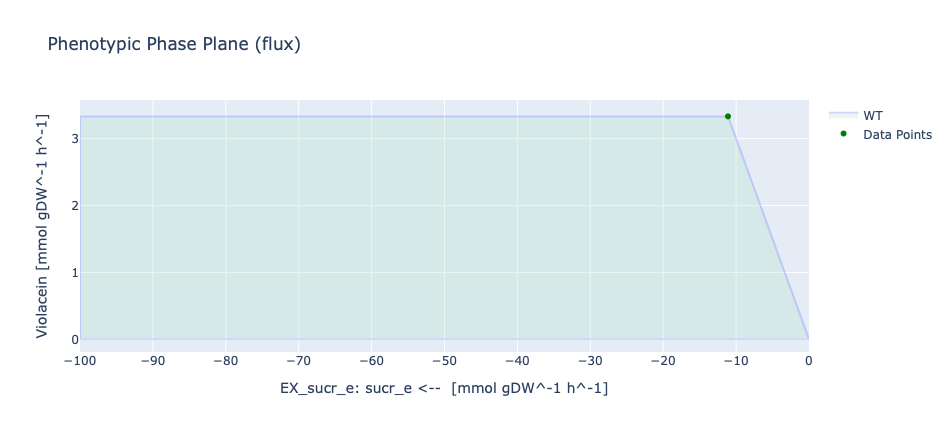

The optimal sucrose uptake for Violacein flux is: -11.111111111111668


In [82]:
# With sucrose as substrate
medium = model_M9_vio_fad.medium
with model_M9_vio_fad:
    medium['EX_glc__D_e'] = 0
    medium['EX_sucr_e'] = 10
    model_M9_vio_fad.medium = medium
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Growth
    growth_rate = model_M9_vio_fad.optimize().objective_value
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Violacein
    violacein_production = model_M9_vio_fad.optimize().objective_value
    violacein_sucr_yield = violacein_production / (-1*model_M9_vio_fad.reactions.EX_sucr_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_sucr]:', violacein_sucr_yield)
    
    model_M9_vio_fad.reactions.EX_sucr_e.bounds = -100,0
    result = phenotypic_phase_plane(model_M9_vio_fad, 
                                variables=[model_M9_vio_fad.reactions.EX_sucr_e],
                                objective=model_M9_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_sucr_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal sucrose uptake for Violacein flux is:", result.data_frame.EX_sucr_e[result.data_frame.objective_upper_bound.idxmax()])

Growth rate for V. natriegens [h^-1]: 0.5623531490067297
Max. violacein production [mmol gDW^-1 h^-1]: 1.2816188870156158
Theoretical maximum yield [mmol_vio / mmol_glyc]: 0.1281618887015616


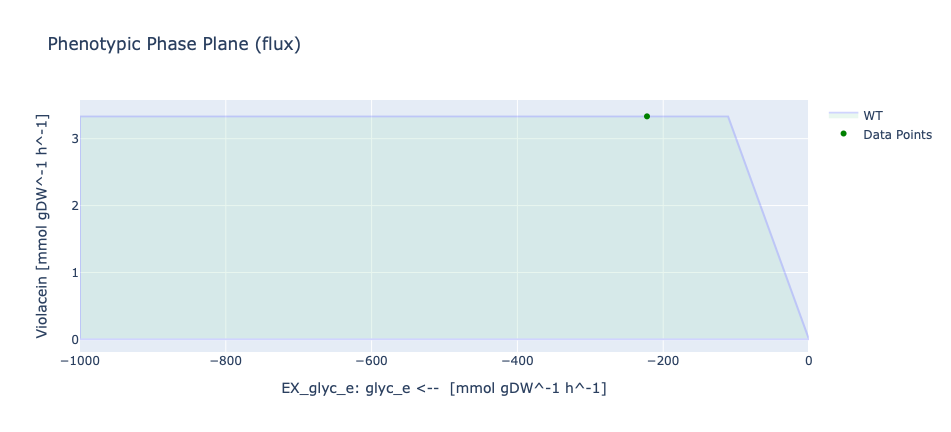

The optimal glycerol uptake for Violacein flux is: -222.22222222222217


In [83]:
# With glycerol as substrate
medium = model_M9_vio_fad.medium
with model_M9_vio_fad:
    medium['EX_glc__D_e'] = 0
    medium['EX_glyc_e'] = 10
    model_M9_vio_fad.medium = medium
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Growth
    growth_rate = model_M9_vio_fad.optimize().objective_value
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Violacein
    violacein_production = model_M9_vio_fad.optimize().objective_value
    violacein_glyc_yield = violacein_production / (-1*model_M9_vio_fad.reactions.EX_glyc_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_glyc]:', violacein_glyc_yield)
    
    model_M9_vio_fad.reactions.EX_glyc_e.bounds = -1000,0
    result = phenotypic_phase_plane(model_M9_vio_fad, 
                                variables=[model_M9_vio_fad.reactions.EX_glyc_e],
                                objective=model_M9_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_glyc_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal glycerol uptake for Violacein flux is:", result.data_frame.EX_glyc_e[result.data_frame.objective_upper_bound.idxmax()])

Growth rate for V. natriegens [h^-1]: 1.2889277191657378
Max. violacein production [mmol gDW^-1 h^-1]: 2.926406926406755
Theoretical maximum yield [mmol_vio / mmol_acgam]: 0.2926406926406755


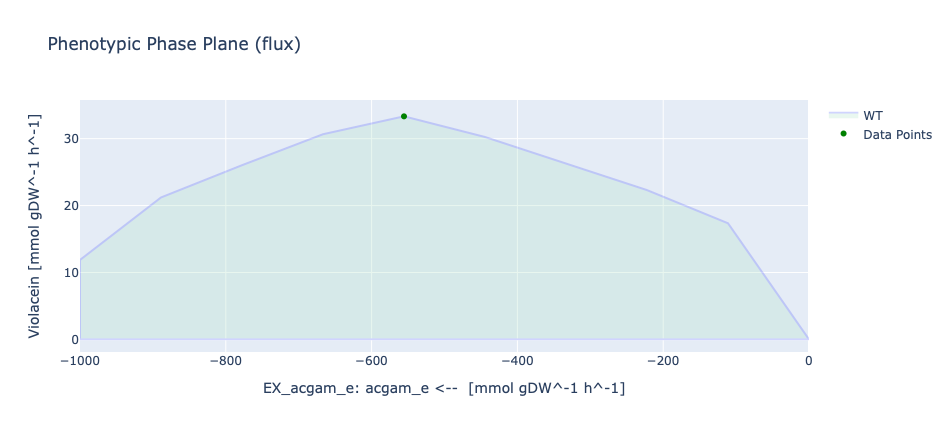

The optimal N-acetyl-D-glucosamine uptake for Violacein flux is: -555.5555555555558


In [85]:
# With N-acetyl-D-glucosamine as substrate
medium = model_M9_vio_fad.medium
with model_M9_vio_fad:
    medium['EX_glc__D_e'] = 0
    medium['EX_acgam_e'] = 10
    model_M9_vio_fad.medium = medium
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Growth
    growth_rate = model_M9_vio_fad.optimize().objective_value
    model_M9_vio_fad.objective = model_M9_vio_fad.reactions.Violacein
    violacein_production = model_M9_vio_fad.optimize().objective_value
    violacein_acgam_yield = violacein_production / (-1*model_M9_vio_fad.reactions.EX_acgam_e.flux)
    
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_acgam]:', violacein_acgam_yield)
    
    model_M9_vio_fad.reactions.EX_acgam_e.bounds = -1000,0
    result = phenotypic_phase_plane(model_M9_vio_fad, 
                                variables=[model_M9_vio_fad.reactions.EX_acgam_e],
                                objective=model_M9_vio_fad.reactions.Violacein,
                                points=10)
    x = result.data_frame.EX_acgam_e[result.data_frame.objective_upper_bound.idxmax()]
    y = result.data_frame.objective_upper_bound[result.data_frame.objective_upper_bound.idxmax()]
    result.plot(plotter, points=[(x,y)], points_colors=["green"])
    print("The optimal N-acetyl-D-glucosamine uptake for Violacein flux is:", result.data_frame.EX_acgam_e[result.data_frame.objective_upper_bound.idxmax()])

## Model with media M9 with added violacein (using O2)

In [2]:
model_M9_vio_o2=read_sbml_model('Models/model_VN_M9_vio-o2.xml')

In [3]:
# With glucose as substrate
medium = model_M9_vio_o2.medium
with model_M9_vio_o2:
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Growth
    growth_rate = model_M9_vio_o2.optimize().objective_value
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Violacein
    violacein_production = model_M9_vio_o2.optimize().objective_value
    violacein_glc_yield = violacein_production / (-1*model_M9_vio_o2.reactions.EX_glc__D_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_glc]:', violacein_glc_yield)

Growth rate for V. natriegens [h^-1]: 0.7188575696969642
Max. violacein production [mmol gDW^-1 h^-1]: 1.8918918918918923
Theoretical maximum yield [mmol_vio / mmol_glc]: 0.18918918918918923


In [4]:
# With D-mannitol as substrate
medium = model_M9_vio_o2.medium
with model_M9_vio_o2:
    medium['EX_glc__D_e'] = 0
    medium['EX_mnl_e'] = 10
    model_M9_vio_o2.medium = medium
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Growth
    growth_rate = model_M9_vio_o2.optimize().objective_value
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Violacein
    violacein_production = model_M9_vio_o2.optimize().objective_value
    violacein_mnl_yield = violacein_production / (-1*model_M9_vio_o2.reactions.EX_mnl_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_mnl]:', violacein_mnl_yield)

Growth rate for V. natriegens [h^-1]: 0.7188575696969655
Max. violacein production [mmol gDW^-1 h^-1]: 1.7777777777777777
Theoretical maximum yield [mmol_vio / mmol_mnl]: 0.17777777777777776


In [5]:
# With sucrose as substrate
medium = model_M9_vio_o2.medium
with model_M9_vio_o2:
    medium['EX_glc__D_e'] = 0
    medium['EX_sucr_e'] = 10
    model_M9_vio_o2.medium = medium
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Growth
    growth_rate = model_M9_vio_o2.optimize().objective_value
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Violacein
    violacein_production = model_M9_vio_o2.optimize().objective_value
    violacein_sucr_yield = violacein_production / (-1*model_M9_vio_o2.reactions.EX_sucr_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_sucr]:', violacein_sucr_yield)

Growth rate for V. natriegens [h^-1]: 0.8930785785011381
Max. violacein production [mmol gDW^-1 h^-1]: 2.432432432432433
Theoretical maximum yield [mmol_vio / mmol_sucr]: 0.24324324324324328


In [6]:
# With glycerol as substrate
medium = model_M9_vio_o2.medium
with model_M9_vio_o2:
    medium['EX_glc__D_e'] = 0
    medium['EX_glyc_e'] = 10
    model_M9_vio_o2.medium = medium
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Growth
    growth_rate = model_M9_vio_o2.optimize().objective_value
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Violacein
    violacein_production = model_M9_vio_o2.optimize().objective_value
    violacein_glyc_yield = violacein_production / (-1*model_M9_vio_o2.reactions.EX_glyc_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_glyc]:', violacein_glyc_yield)

Growth rate for V. natriegens [h^-1]: 0.5364811289243665
Max. violacein production [mmol gDW^-1 h^-1]: 1.2617598229109015
Theoretical maximum yield [mmol_vio / mmol_glyc]: 0.12617598229109014


In [7]:
# With N-acetyl-D-glucosamine as substrate
medium = model_M9_vio_o2.medium
with model_M9_vio_o2:
    medium['EX_glc__D_e'] = 0
    medium['EX_acgam_e'] = 10
    model_M9_vio_o2.medium = medium
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Growth
    growth_rate = model_M9_vio_o2.optimize().objective_value
    model_M9_vio_o2.objective = model_M9_vio_o2.reactions.Violacein
    violacein_production = model_M9_vio_o2.optimize().objective_value
    violacein_acgam_yield = violacein_production / (-1*model_M9_vio_o2.reactions.EX_acgam_e.flux)
    print('Growth rate for V. natriegens [h^-1]:', growth_rate)
    print('Max. violacein production [mmol gDW^-1 h^-1]:', violacein_production)
    print('Theoretical maximum yield [mmol_vio / mmol_acgam]:', violacein_acgam_yield)

Growth rate for V. natriegens [h^-1]: 0.6167879625967698
Max. violacein production [mmol gDW^-1 h^-1]: 1.5624999999999993
Theoretical maximum yield [mmol_vio / mmol_acgam]: 0.15624999999999994
